<h1> Introduction to Regression </h1> 

<p> We all are familiar with the classic Linear Regression problem from our <b> university labs</b> </p>
<img src="images/linear_regression.png" alt="linear regression" width="500" height="500">

<h2> House Price Prediction </h2>

<p> Suppose we want to develop a software that get a house area and predict the house price </p>
<img src="images/house_price_prediction.jpg" alt="house price prediction" width="500" height="250">

<h3>Data Gathering</h3>

<p> First of all we search over the real states of the neighbourhood and take notes of all available cases area and suggested price. </p>

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("darkgrid")

np.random.seed(24)
x = np.random.randint(30, high=150, size=100, dtype=int)
y = 25 * x + 15
noise = np.random.normal(0, 400, size=100)
y_noisy = np.clip((y + noise).astype(int), 200, None)
dataset = np.array([x, y_noisy]).T
dataset_df = pd.DataFrame(dataset, columns=["area", "price"])
dataset_df.head(20)

,area,price
0,64,1557
1,33,200
2,94,2958
3,117,2801
4,47,1002
5,47,2093
6,31,200
7,130,3860
8,109,3467
9,34,737


Text(0, 0.5, 'Price ($)')

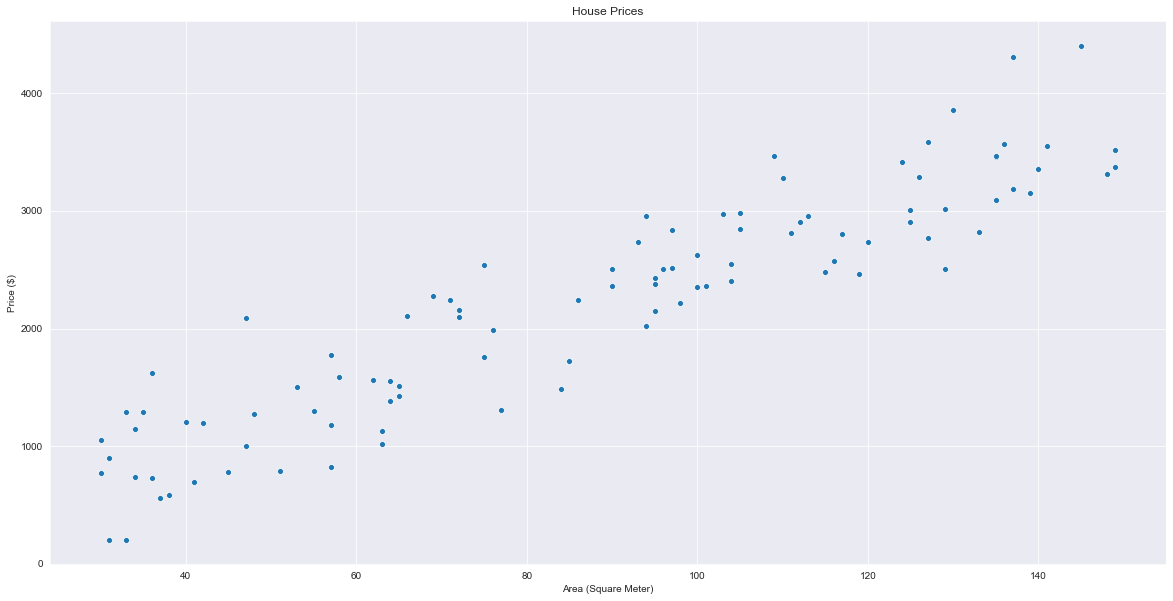

In [119]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")

<h4> These pairs are our <b>DATASET (OBSERVATION)</b>, the area variable is the <b> input </b> of the problem and the price variable is  <b>output or label</b> </h4>

<h2> Choosing Model </h2>

<p> Based on the above plot we can observe that a <b> line </b> can fit to the data properly (not a polynomial or sinusoid)</p>

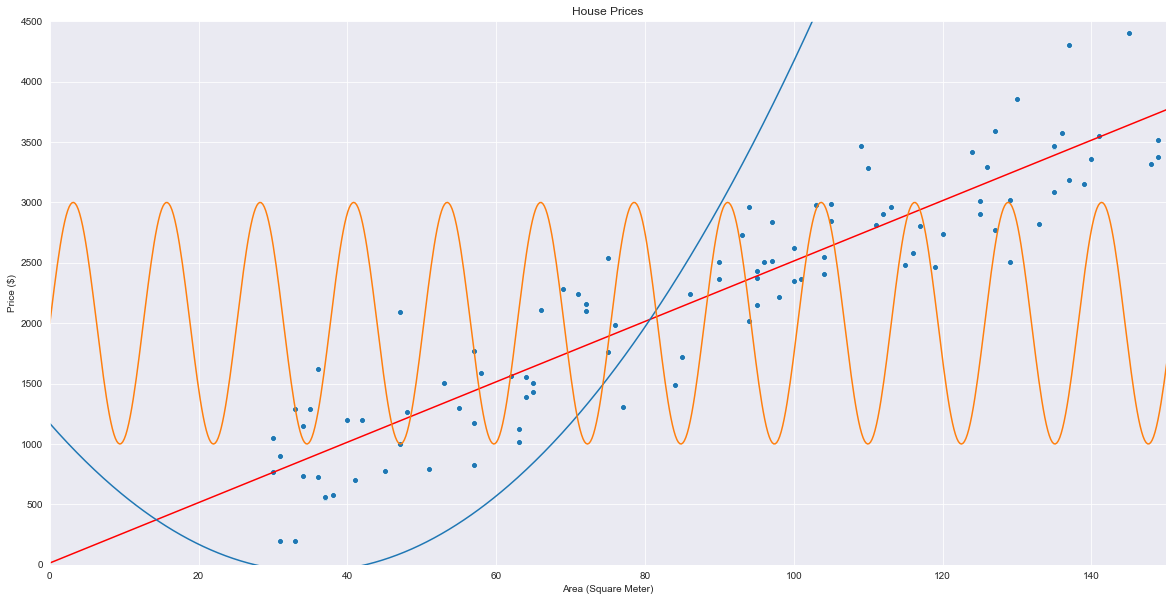

In [148]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")
x_plot = np.linspace(0, 200, 1000)
y_plot_lin = 25  * x_plot + 15
plt.plot(x_plot, y_plot_lin, color="r")
y_plot_pol = 1 * (x_plot - 40) ** 2 + 10  * (x_plot - 40) -30
plt.plot(x_plot, y_plot_pol)
y_plot_sin = 1000 * np.sin(x_plot/2) + 2000
plt.plot(x_plot, y_plot_sin)
plt.ylim(0, 4500)
plt.xlim(0, 150)
plt.show()

<h2> Which line? </h2>

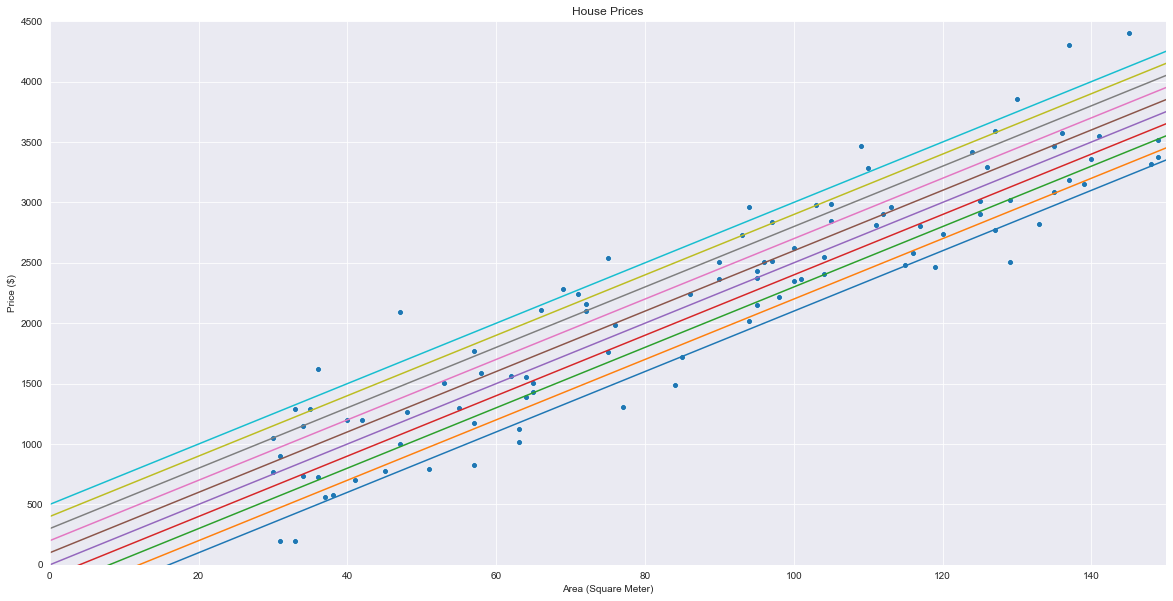

In [132]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")
x_plot = np.linspace(0, 200, 1000)
b = -400
for i in range (10):
    y_plot = 25  * x_plot + b
    b += 100
    plt.plot(x_plot, y_plot)
plt.ylim(0, 4500)
plt.xlim(0, 150)
plt.show()

<h3> How we represent a line </h3>

$$
y = a_1x + a_2 
$$

So if we could determine the best $a_1$ and $a_2$ which can represent the dataset charactristics we could say we solved the problem

<h4> However what do we mean by <b>Best</b>?</p>

$$
(x_1, y_1^{true})  \rightarrow y_1^{predict} = a_1x_1 + a_2  \\
(x_2, y_2^{true}) \rightarrow y_2^{predict} = a_1x_2 + a_2 \\
(x_3, y_3^{true}) \rightarrow y_3^{predict} = a_1x_3 + a_2\\
(x_4, y_4^{true}) \rightarrow y_4^{predict} = a_1x_4 + a_2 \\
(x_5, y_5^{true}) \rightarrow y_5^{predict} = a_1x_5 + a_2\\
\vdots
$$

The best model is the model which its output $y^{predict}$ is very close to the actual output $y^{true}$
$$
|y^{predict}_n - y^{true}_n|
$$
